# Import general classes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import os
import sys
import pylab
import matplotlib.pyplot as plt

# Import DLITE classes

We import 8 classes -  node, edge, cell, colony, data, ManualTracing, ManualTracingMultiple, SurfaceEvolver

Node defines (x,y) location of all edge-edge intersections

Edge defines co-ordinates, directed curvature and end nodes of all cell-cell intersections

Cell defines perimeter, area and all edges and nodes comprising a cycle of edges

Colony defines all cells in a given image 

Data defines a colony from pickle file formats generated at AICS

ManualTracing defines a colony from Manual tracing of images generated using NeuronJ 

ManualTracingMultiple defines colonies at multiple time points each of which is manually traced out using NeuronJ

SurfaceEvolver defines colonies from multiple txt files generated from Surface Evolver 

In [2]:
from DLITE.cell_describe import node, edge, cell, colony
from DLITE.ManualTracingMultiple import ManualTracingMultiple
from DLITE.SurfaceEvolver import SurfaceEvolver
from DLITE.PlottingFunctions import PlottingFunctions

# Define the dataset

ManualTracingMultiple can read txt files of the form (name_first + number + name_end). For example, name_first = 'MAX_20170123_I01_003-Scene-4-P4-split_T', number = 1, name_end = '.ome.txt' is a txt file with the name 
'MAX_20170123_I01_003-Scene-4-P4-split_T1.ome.txt'. Here, we have 30 timepoints so we define number as an integer from 0 to 29.

In [3]:
os.chdir(r'../Notebooks/data/ZO-1_data/Time-series_1')
timepoints = [int(i) for i in np.linspace(0, 29, 30)]

In [4]:
ManualTracingMultipleInstance = ManualTracingMultiple(timepoints, name_first = 'MAX_20170123_I01_003-Scene-4-P4-split_T',
                                                           name_last = '.ome.txt', type=None)

# Computation

Given timepoints and an instance of the ManualTracingMultiple class, we can compute dynamic cell-cell forces and store it in a dictionary named colonies as follows

In [5]:
# %%prun
colonies = ManualTracingMultipleInstance.main_computation_based_on_prev(timepoints, colonies = None, index = None, 
                                          old_dictionary = None, solver = 'CellFIT', maxiter = 60*1000)

File 0 used a Cutoff value ------> 14


/Users/ritvikvasan/Documents/repos/DLITE/DLITE/cell_describe.py:905: LinAlgWarning: Ill-conditioned matrix (rcond=1.30265e-18): result may not be accurate.
  x = linalg.solve(r2, y)  # Solve Rx=y


Solver is CellFIT
First colony {'0': <DLITE.cell_describe.colony object at 0x114f417f0>}
File 1 used a Cutoff value ------> 14
node a = node b, possible topological change


/Users/ritvikvasan/Documents/repos/DLITE/DLITE/cell_describe.py:905: LinAlgWarning: Ill-conditioned matrix (rcond=3.6658e-20): result may not be accurate.
  x = linalg.solve(r2, y)  # Solve Rx=y


Next colony number 1
File 2 used a Cutoff value ------> 14


/Users/ritvikvasan/Documents/repos/DLITE/DLITE/cell_describe.py:905: LinAlgWarning: Ill-conditioned matrix (rcond=9.92725e-19): result may not be accurate.
  x = linalg.solve(r2, y)  # Solve Rx=y


Next colony number 2
File 3 used a Cutoff value ------> 14


/Users/ritvikvasan/Documents/repos/DLITE/DLITE/cell_describe.py:905: LinAlgWarning: Ill-conditioned matrix (rcond=2.85955e-18): result may not be accurate.
  x = linalg.solve(r2, y)  # Solve Rx=y


Next colony number 3
File 4 used a Cutoff value ------> 20
node a = node b, possible topological change
Next colony number 4
File 5 used a Cutoff value ------> 14
Next colony number 5
File 6 used a Cutoff value ------> 14
Next colony number 6
File 7 used a Cutoff value ------> 14
Next colony number 7
File 8 used a Cutoff value ------> 17
Next colony number 8
File 9 used a Cutoff value ------> 17
Next colony number 9
File 10 used a Cutoff value ------> 14
Next colony number 10
File 11 used a Cutoff value ------> 14
Next colony number 11
File 12 used a Cutoff value ------> 12
Next colony number 12
File 13 used a Cutoff value ------> 14


/Users/ritvikvasan/Documents/repos/DLITE/DLITE/cell_describe.py:905: LinAlgWarning: Ill-conditioned matrix (rcond=1.80949e-18): result may not be accurate.
  x = linalg.solve(r2, y)  # Solve Rx=y


Next colony number 13
File 14 used a Cutoff value ------> 16
Next colony number 14
File 15 used a Cutoff value ------> 16
Next colony number 15
File 16 used a Cutoff value ------> 17
Next colony number 16
File 17 used a Cutoff value ------> 14
Next colony number 17
File 18 used a Cutoff value ------> 16
Next colony number 18
File 19 used a Cutoff value ------> 16
Next colony number 19
File 20 used a Cutoff value ------> 16
node a = node b, possible topological change
Next colony number 20
File 21 used a Cutoff value ------> 12
Next colony number 21
File 22 used a Cutoff value ------> 16
Next colony number 22
File 23 used a Cutoff value ------> 16
Next colony number 23
File 24 used a Cutoff value ------> 16
Next colony number 24
File 25 used a Cutoff value ------> 16
Next colony number 25
File 26 used a Cutoff value ------> 16
Next colony number 26
File 27 used a Cutoff value ------> 16
Next colony number 27
File 28 used a Cutoff value ------> 16
node a = node b, possible topological ch

Now we have 30 colony classes for each time point

In [6]:
colonies

{'0': <DLITE.cell_describe.colony at 0x114f417f0>,
 '1': <DLITE.cell_describe.colony at 0x1030d68d0>,
 '2': <DLITE.cell_describe.colony at 0x1152194a8>,
 '3': <DLITE.cell_describe.colony at 0x114f640f0>,
 '4': <DLITE.cell_describe.colony at 0x114e9dcc0>,
 '5': <DLITE.cell_describe.colony at 0x114ee6898>,
 '6': <DLITE.cell_describe.colony at 0x114f306a0>,
 '7': <DLITE.cell_describe.colony at 0x114fbc668>,
 '8': <DLITE.cell_describe.colony at 0x114e34630>,
 '9': <DLITE.cell_describe.colony at 0x115009208>,
 '10': <DLITE.cell_describe.colony at 0x1150e35f8>,
 '11': <DLITE.cell_describe.colony at 0x1151304a8>,
 '12': <DLITE.cell_describe.colony at 0x11517c198>,
 '13': <DLITE.cell_describe.colony at 0x11518beb8>,
 '14': <DLITE.cell_describe.colony at 0x115069be0>,
 '15': <DLITE.cell_describe.colony at 0x1151ff978>,
 '16': <DLITE.cell_describe.colony at 0x101e05438>,
 '17': <DLITE.cell_describe.colony at 0x101e50438>,
 '18': <DLITE.cell_describe.colony at 0x101e98128>,
 '19': <DLITE.cell_des

# Post processing

We want to store all the information contained in colonies. We do this in 4 dataframes

nodes_dataframe has node related information like tension residuals, numbers of connected edges, average curvature of connected edges etc. 

edges_dataframe has edge related information like edge tension, stochasticity in tension, edge curvature etc. 

cells_dataframe has cell related information like cell pressure, area, perimeter etc. 

tensor_dataframe has colony related information like average strain rate, rotation, horizontal and vertical velocity etc.

In [7]:
PlottingFunctionsInstance = PlottingFunctions()

In [8]:
# We first find labels of edges that are present in all the colonies

common_edge_labels = PlottingFunctionsInstance.get_repeat_edge(colonies)
common_cell_labels = PlottingFunctionsInstance.get_repeat_cell(colonies)

In [9]:
# Make the dataframes


edges_dataframe, cells_dataframe = PlottingFunctionsInstance.seaborn_plot(None, colonies,
                                                                                  common_edge_labels,
                                                                                  common_cell_labels,
                                                                                  ground_truth = None)
nodes_dataframe = PlottingFunctionsInstance.seaborn_nodes_dataframe(colonies, None)
tensor_dataframe = PlottingFunctionsInstance.seaborn_cells_dataframe_tensor(colonies)

/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1351: RuntimeWarning: invalid value encountered in double_scalars
  cell_data['Pressures'].append([2*((c.pressure - min_pres) / float(max_pres - min_pres)) - 1 for c in v.cells if c.label == cell_lab][0])
/Users/ritvikvasan/Documents/repos/DLITE/DLITE/PlottingFunctions.py:1359: RuntimeWarning: invalid value encountered in double_scalars
  - min_pres) / float(max_pres - min_pres))


## Heatmaps

In [10]:
tension_table = edges_dataframe.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

In [11]:
sns.set_context("paper", font_scale=3)  
%matp
fig, ax = plt.subplots(1, 1, figsize = (5,10),sharey=True)
sns.heatmap(tension_table, ax=ax,
            vmin=0, vmax=3,cmap = 'jet')

## Colony colormaps

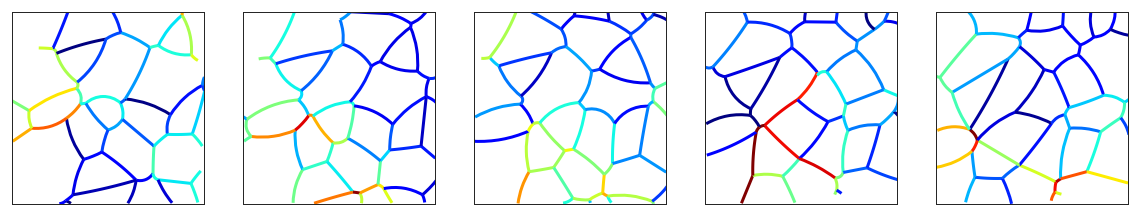

In [12]:
# Plot 
import pylab
import matplotlib.pyplot as plt


sns.set(style="white")
sns.set_context("paper", font_scale = 2.5)

total = 5
fig, axn = plt.subplots(1, total, figsize = (20,20),sharey=True)
nums= [0,5,10,15,20]

for i, ax in enumerate(axn.flat):
    col = colonies[str(nums[i])]
    tensions = [e.tension for e in col.tot_edges]
    mean_ten = np.mean(tensions)
    tensions = [e/mean_ten for e in tensions]

    col.plot_tensions(ax, fig, tensions, min_x=0, max_x=1000, min_y=0, max_y=1000,
                      min_ten = 0, max_ten = 3, specify_color = 'jet',cbar = 'no', lw = 3)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set(xlim = [0,1000], ylim = [0,1000], aspect = 1)

# pylab.savefig('geometry.pdf', bbox_inches = 'tight')
# pylab.savefig('geometry.svg', bbox_inches = 'tight')

## Tension movies

In [12]:
sns.set(style="darkgrid")
sns.set_context("talk", font_scale=0.75)

fig, ax = plt.subplots(1,1, figsize = (6,4))

ManualTracingMultipleInstance.plot_tensions(fig, ax, colonies,min_x=0, max_x=1000, min_y=0, max_y=1000, 
                                            min_ten=0,max_ten=3, specify_aspect=None,specify_color='jet' ,
                                            type=None, lw = 2)